In [1]:
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import os
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Anàlisi exploratori de les dades a tot el conjunt de dades

In [2]:
#carregar els dos dataframes: test i validació. Construir un dataframe de totes les dades
df_test = pd.read_excel('Resultats/resultats_4_test.xlsx', engine='openpyxl')
df_valid = pd.read_excel('Resultats/resultats_4_valid.xlsx', engine='openpyxl')
df_tot = pd.concat([df_test, df_valid], axis=0)
#df_tot.to_excel('Resultats/resultats_4_tot.xlsx', index=False)

### Correlacions 

In [3]:
df=df_tot
df = df.drop('Correct', axis=1)
df

,Image,True Label,Predicted Label,Confidence,Tort Score All Tf,Tort Score Tf11,Tort. coverage All Tf. Blocks,Tort. coverage Tf. Block_0,Tort. coverage Tf. Block_1,Tort. coverage Tf. Block_2,Tort. coverage Tf. Block_3,Tort. coverage Tf. Block_4,Tort. coverage Tf. Block_5,Tort. coverage Tf. Block_6,Tort. coverage Tf. Block_7,Tort. coverage Tf. Block_8,Tort. coverage Tf. Block_9,Tort. coverage Tf. Block_10,Tort. coverage Tf. Block_11
0,test_001.jpg,1,1,69.63,2.24,0.00,45.83,45.31,18.23,25.52,97.92,19.27,13.54,0.00,0.00,0.00,0.00,0.00,2.60
1,test_002.jpg,1,1,86.83,0.74,0.00,61.06,29.39,21.02,35.03,80.89,48.95,2.64,0.00,0.00,0.00,0.00,4.73,33.03
2,test_003.jpg,1,1,85.00,0.47,0.00,34.92,16.14,14.42,18.52,61.51,64.68,5.42,1.85,1.98,1.85,1.85,1.72,17.86
3,test_004.jpg,1,1,79.09,1.88,0.00,50.68,40.33,15.26,28.88,77.38,18.53,17.44,2.72,3.27,2.72,2.72,2.72,7.36
4,test_005.jpg,1,1,89.82,0.00,0.00,23.84,5.70,18.57,33.54,35.65,29.54,10.34,2.53,2.74,2.53,2.11,1.69,1.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,valid_527.jpg,0,0,87.12,1.09,0.99,47.83,49.83,57.83,56.00,20.00,6.00,7.67,5.50,5.83,5.83,5.83,5.50,8.33
527,valid_528.jpg,0,1,52.21,2.74,0.00,44.53,57.54,50.59,27.51,32.25,26.63,20.27,3.40,3.55,4.14,4.44,4.44,3.85
528,valid_529.jpg,0,0,88.95,0.71,0.00,55.56,48.38,40.65,51.05,47.26,30.38,18.85,1.55,1.83,1.41,1.41,1.13,1.55
529,valid_530.jpg,0,0,71.86,0.73,0.00,54.50,44.46,40.29,41.20,46.54,30.25,21.12,2.35,2.35,2.35,2.35,2.35,2.35


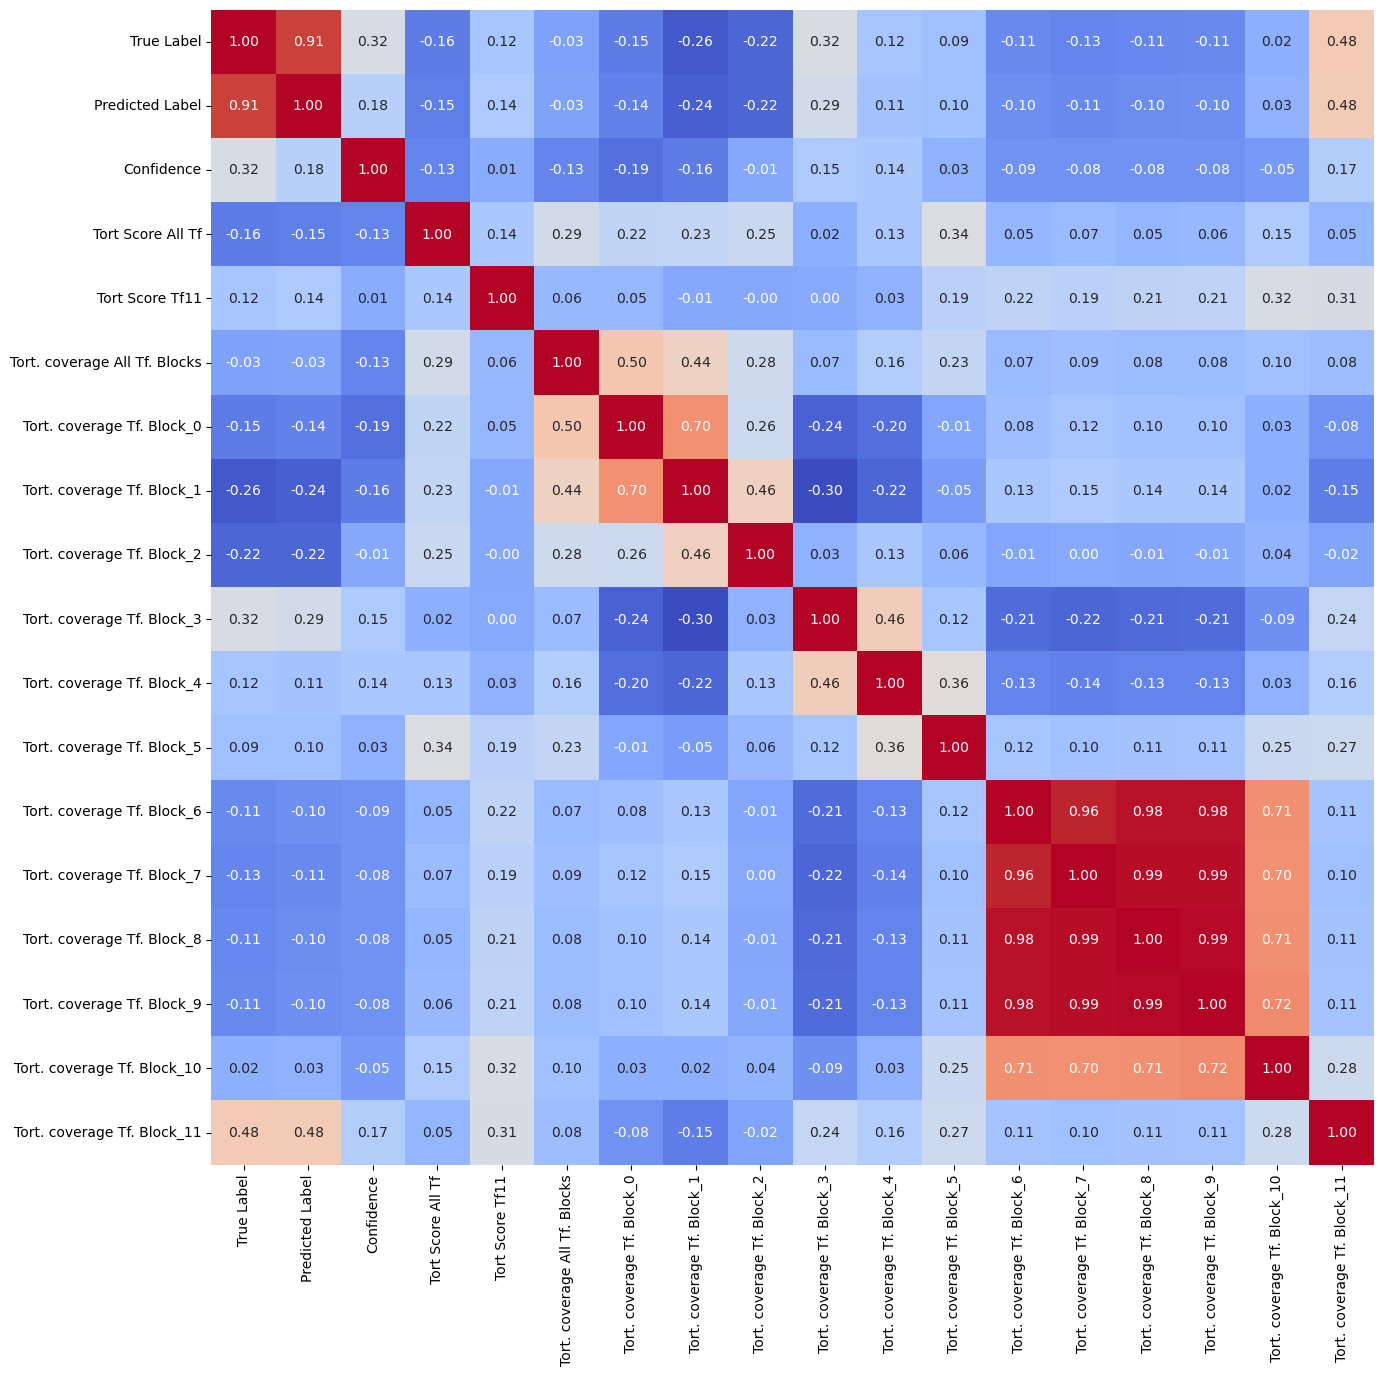

In [4]:
#Correlation matrix

df_numeric = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(15,15))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=False)
plt.show()


### Tortuosity Coverage per Transformer Block

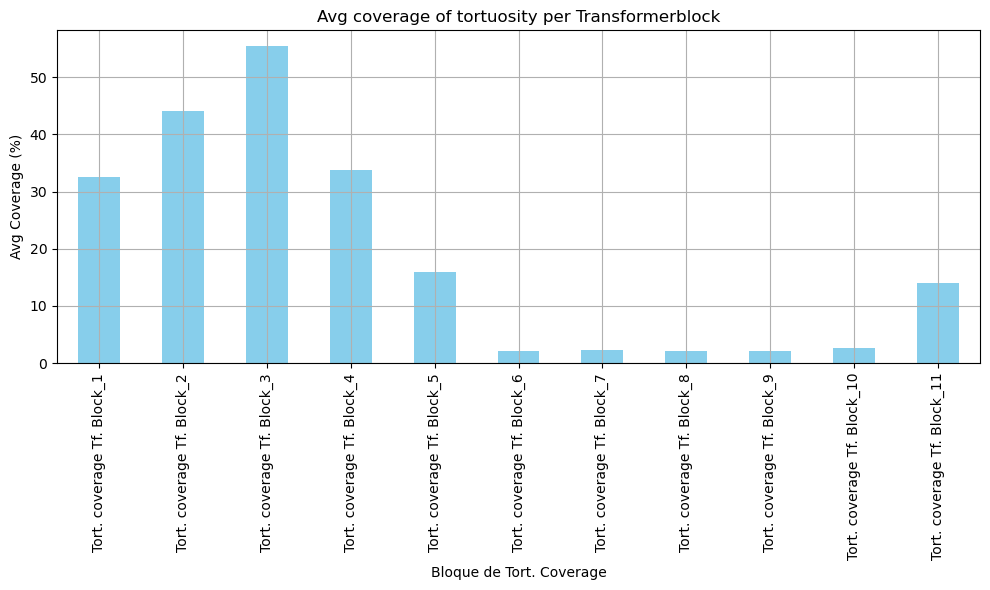

In [5]:
#Select columns
tort_coverage_columns = df.columns[8:]  
tort_coverage_data = df[tort_coverage_columns]

#Compute avg per column
mean_tort_coverages = tort_coverage_data.mean()

#Bar plot
plt.figure(figsize=(10, 6))
mean_tort_coverages.plot(kind='bar', color='skyblue')
plt.title('Avg coverage of tortuosity per Transformerblock')
plt.xlabel('Bloque de Tort. Coverage')
plt.ylabel('Avg Coverage (%)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


### Tortuosity Score Ratio All Tf per Predicció d'etiqueta

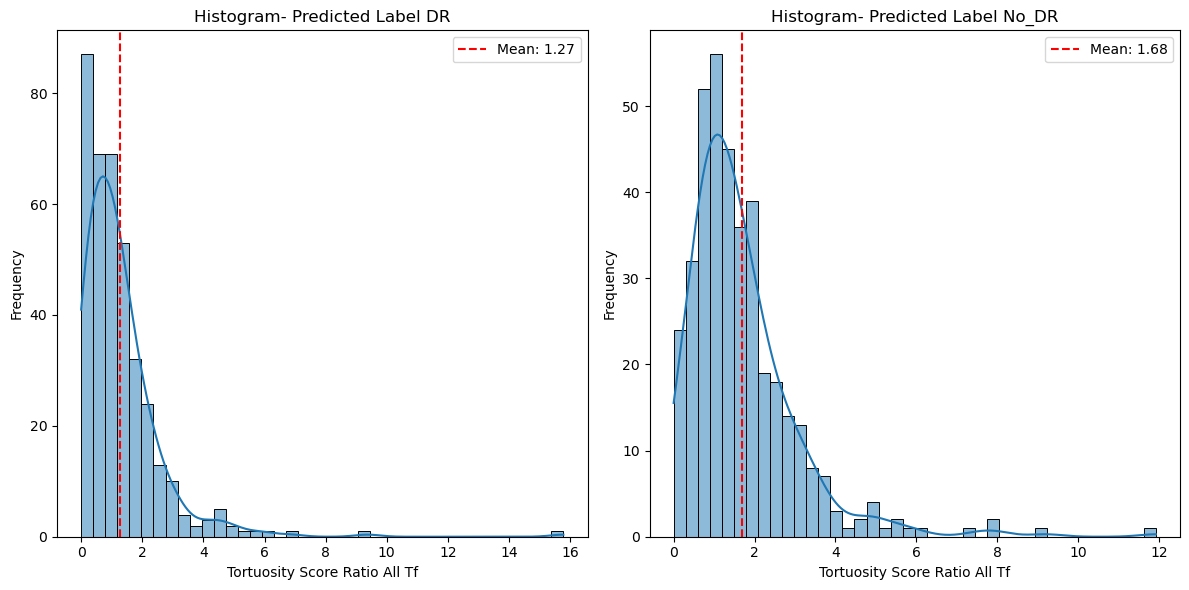

In [6]:
#Define the two subsets
subsets = {
    'Predicted Label DR': df[df['Predicted Label'] == 1],
    'Predicted Label No_DR': df[df['Predicted Label'] == 0]
}

metric='Tort Score All Tf'

plt.figure(figsize=(12, 6))

#Subplot counter
i = 1

#Plot histograms
for label, subset in subsets.items():
    plt.subplot(1, 2, i)  # Definir subplots
    sns.histplot(subset[metric], bins=40, kde=True)
    plt.axvline(subset[metric].mean(), color='r', linestyle='--', label=f'Mean: {subset[metric].mean():.2f}')
    plt.title(f'Histogram- {label}')
    plt.xlabel('Tortuosity Score Ratio All Tf')
    plt.ylabel('Frequency')
    plt.legend()
    i += 1  # Incrementar el contador de subplots

plt.tight_layout()
plt.show()




In [44]:
from scipy import stats
rvs1=df['Tort Score All Tf'].loc[df['Predicted Label']==1].values
rvs2=df['Tort Score All Tf'].loc[df['Predicted Label']==0].values
stats.ttest_ind(rvs1, rvs2, equal_var=False)

Ttest_indResult(statistic=-4.135248986841748, pvalue=3.9409400697358e-05)

### Tortuosity Score Ratio Tf11 per Predicció d'Etiqueta

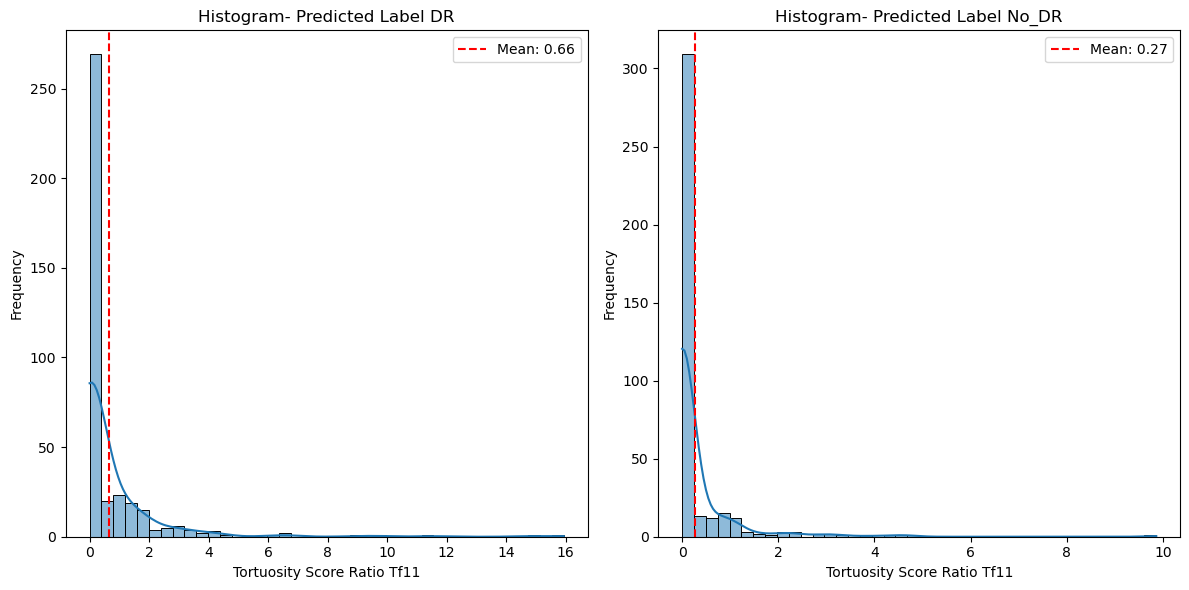

In [7]:

subsets = {
    'Predicted Label DR': df[df['Predicted Label'] == 1],
    'Predicted Label No_DR': df[df['Predicted Label'] == 0]
}


metric='Tort Score Tf11'

# Configurar la visualización
plt.figure(figsize=(12, 6))

# Contador para los subplots
i = 1

# Generar los histogramas
for label, subset in subsets.items():
    plt.subplot(1, 2, i)  # Definir subplots
    sns.histplot(subset[metric], bins=40, kde=True)
    plt.axvline(subset[metric].mean(), color='r', linestyle='--', label=f'Mean: {subset[metric].mean():.2f}')
    plt.title(f'Histogram- {label}')
    plt.xlabel('Tortuosity Score Ratio Tf11')
    plt.ylabel('Frequency')
    plt.legend()
    i += 1  # Incrementar el contador de subplots

plt.tight_layout()
plt.show()


In [45]:
#T-test
from scipy import stats
rvs1=df['Tort Score Tf11'].loc[df['Predicted Label']==1].values
rvs2=df['Tort Score Tf11'].loc[df['Predicted Label']==0].values
stats.ttest_ind(rvs1, rvs2, equal_var=False)

Ttest_indResult(statistic=3.9512133594989964, pvalue=8.79262767363337e-05)

### Cobertures per Predicció etiqueta

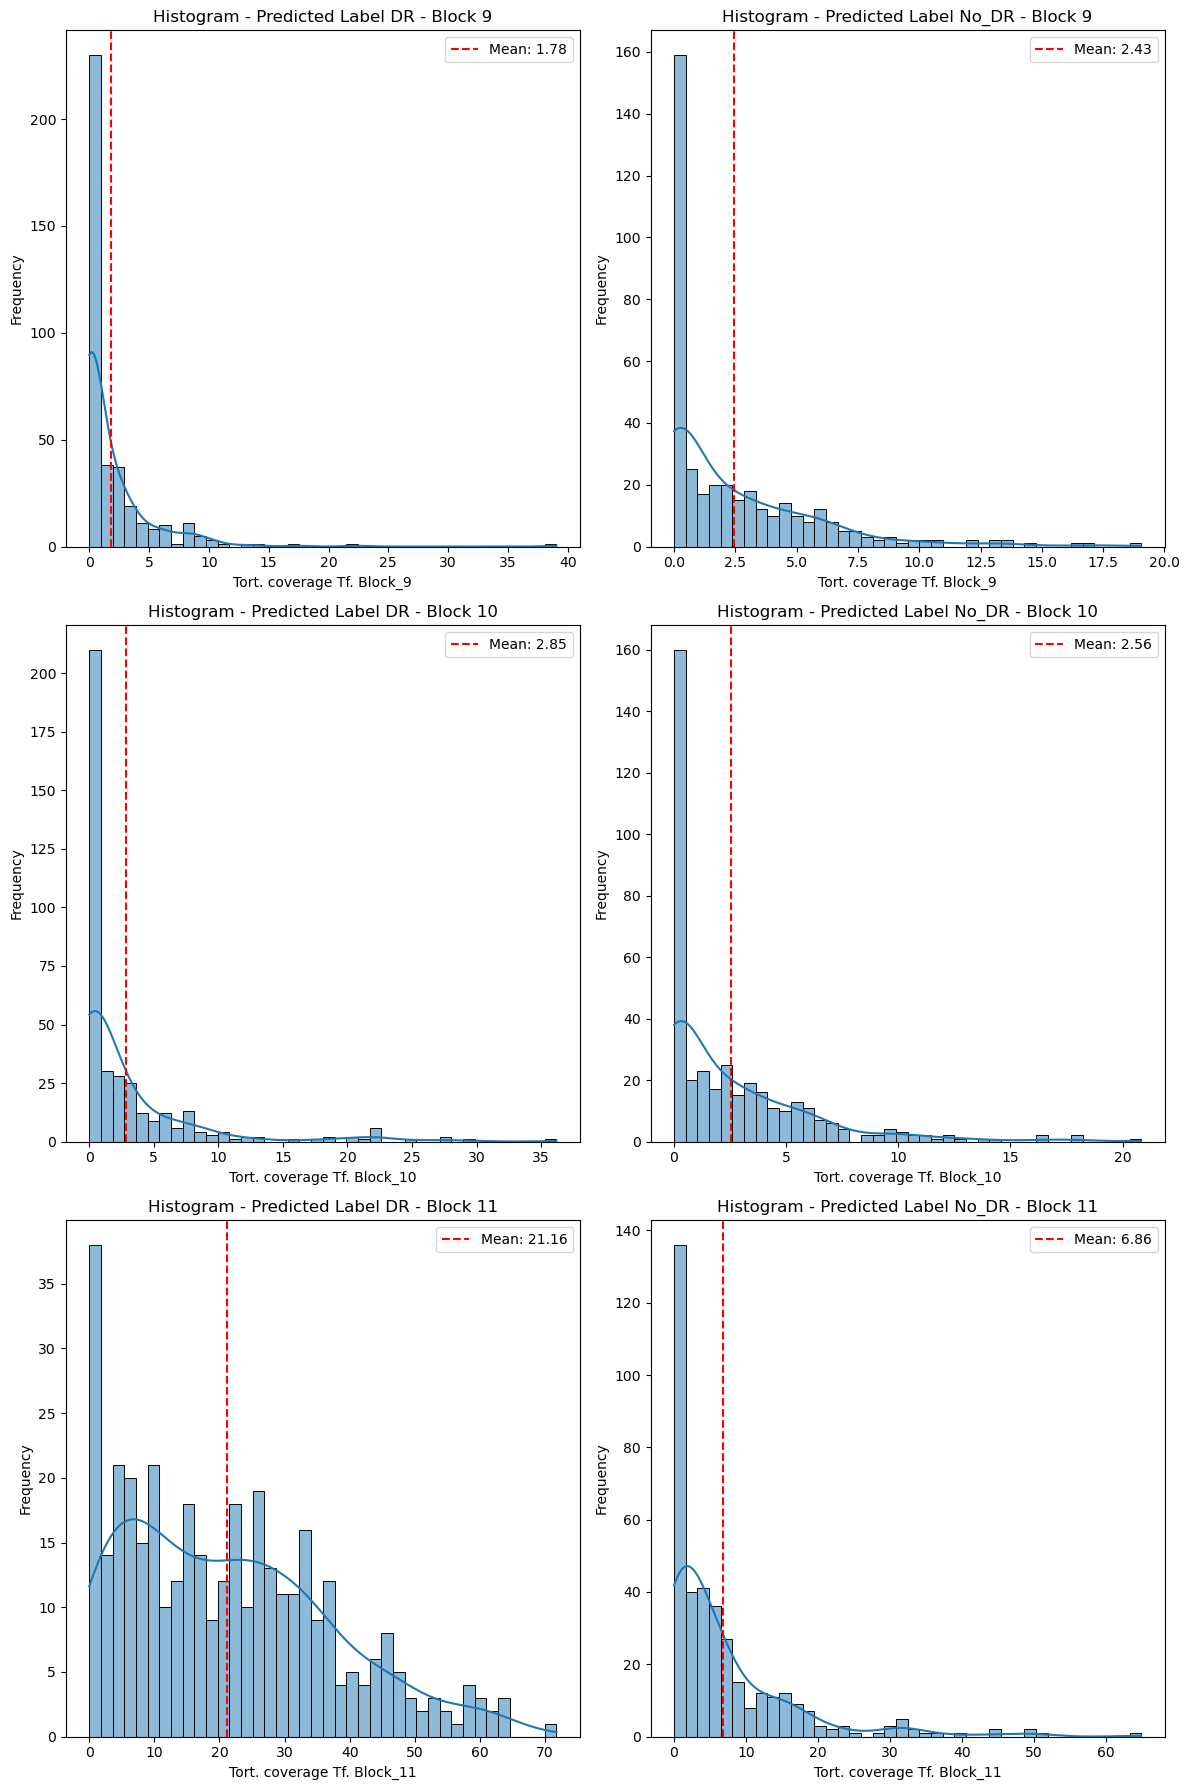

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

subsets = {
    'Predicted Label DR': df[df['Predicted Label'] == 1],
    'Predicted Label No_DR': df[df['Predicted Label'] == 0]
}

# Configure plot for a batch of 3 blocks
fig, axes = plt.subplots(3, 2, figsize=(12, 18))  # 3 filas para los 3 bloques, 2 columnas para cada etiqueta

# Iterate over 3 blocks in the batch
for block in range(9, 12):
    metric = f'Tort. coverage Tf. Block_{block}'
    
    #Init subplot index base on current range
    block_index = block - 9  # first block in the batch
    
    for i, (label, subset) in enumerate(subsets.items()):
        ax = axes[block_index, i] 
        sns.histplot(subset[metric], bins=40, kde=True, ax=ax)
        ax.axvline(subset[metric].mean(), color='r', linestyle='--', label=f'Mean: {subset[metric].mean():.2f}')
        ax.set_title(f'Histogram - {label} - Block {block}')
        ax.set_xlabel(metric)
        ax.set_ylabel('Frequency')
        ax.legend()

plt.tight_layout()
plt.show()


### Visualitzar els ratios de cobertura segons predicció

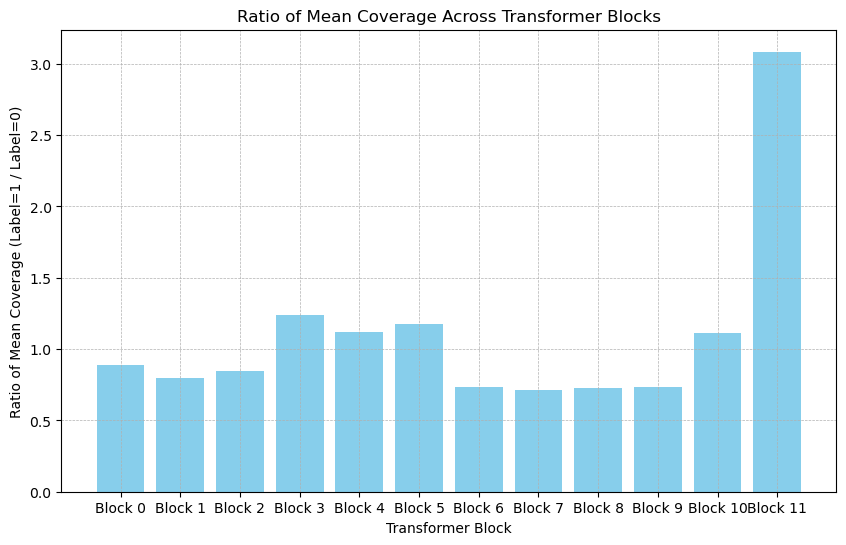

In [9]:
import matplotlib.pyplot as plt
import pandas as pd


subset_DR = df[df['Predicted Label'] == 1]
subset_No_DR = df[df['Predicted Label'] == 0]

# List for store ratios
ratios = []

# Iterate over transformerblocks 0 to 11
for block in range(12):
    # Build name of metric
    metric = f'Tort. coverage Tf. Block_{block}'
    
    #Compute metric avg for every subset
    mean_DR = subset_DR[metric].mean()
    mean_No_DR = subset_No_DR[metric].mean()
    
    #Compute ratio of avg values
    if mean_No_DR != 0:  # Avoid divide by zero
        ratio = mean_DR / mean_No_DR
    else:
        ratio = None  #Handle if divisor is zero 
    
    #Add ratio to the list
    ratios.append(ratio)

#Bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(12), ratios, color='skyblue')
plt.xlabel('Transformer Block')
plt.ylabel('Ratio of Mean Coverage (Label=1 / Label=0)')
plt.title('Ratio of Mean Coverage Across Transformer Blocks')
plt.xticks(range(12), [f'Block {i}' for i in range(12)])  # Etiquetas para el eje X
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


## Construir model de predicció de Predicted Label a partir de les métriques calculades

In [10]:
df

,Image,True Label,Predicted Label,Confidence,Tort Score All Tf,Tort Score Tf11,Tort. coverage All Tf. Blocks,Tort. coverage Tf. Block_0,Tort. coverage Tf. Block_1,Tort. coverage Tf. Block_2,Tort. coverage Tf. Block_3,Tort. coverage Tf. Block_4,Tort. coverage Tf. Block_5,Tort. coverage Tf. Block_6,Tort. coverage Tf. Block_7,Tort. coverage Tf. Block_8,Tort. coverage Tf. Block_9,Tort. coverage Tf. Block_10,Tort. coverage Tf. Block_11
0,test_001.jpg,1,1,69.63,2.24,0.00,45.83,45.31,18.23,25.52,97.92,19.27,13.54,0.00,0.00,0.00,0.00,0.00,2.60
1,test_002.jpg,1,1,86.83,0.74,0.00,61.06,29.39,21.02,35.03,80.89,48.95,2.64,0.00,0.00,0.00,0.00,4.73,33.03
2,test_003.jpg,1,1,85.00,0.47,0.00,34.92,16.14,14.42,18.52,61.51,64.68,5.42,1.85,1.98,1.85,1.85,1.72,17.86
3,test_004.jpg,1,1,79.09,1.88,0.00,50.68,40.33,15.26,28.88,77.38,18.53,17.44,2.72,3.27,2.72,2.72,2.72,7.36
4,test_005.jpg,1,1,89.82,0.00,0.00,23.84,5.70,18.57,33.54,35.65,29.54,10.34,2.53,2.74,2.53,2.11,1.69,1.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,valid_527.jpg,0,0,87.12,1.09,0.99,47.83,49.83,57.83,56.00,20.00,6.00,7.67,5.50,5.83,5.83,5.83,5.50,8.33
527,valid_528.jpg,0,1,52.21,2.74,0.00,44.53,57.54,50.59,27.51,32.25,26.63,20.27,3.40,3.55,4.14,4.44,4.44,3.85
528,valid_529.jpg,0,0,88.95,0.71,0.00,55.56,48.38,40.65,51.05,47.26,30.38,18.85,1.55,1.83,1.41,1.41,1.13,1.55
529,valid_530.jpg,0,0,71.86,0.73,0.00,54.50,44.46,40.29,41.20,46.54,30.25,21.12,2.35,2.35,2.35,2.35,2.35,2.35


Accuracy in every fold in training set: [0.79146141 0.77011494 0.76885246 0.77704918 0.77540984]
Accuracy in every fold in test set: [0.71895425 0.81699346 0.75657895 0.76973684 0.78289474]
Test Accuracy mean: 0.7690316477468181
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       404
           1       0.79      0.72      0.75       358

    accuracy                           0.78       762
   macro avg       0.78      0.77      0.77       762
weighted avg       0.78      0.78      0.78       762



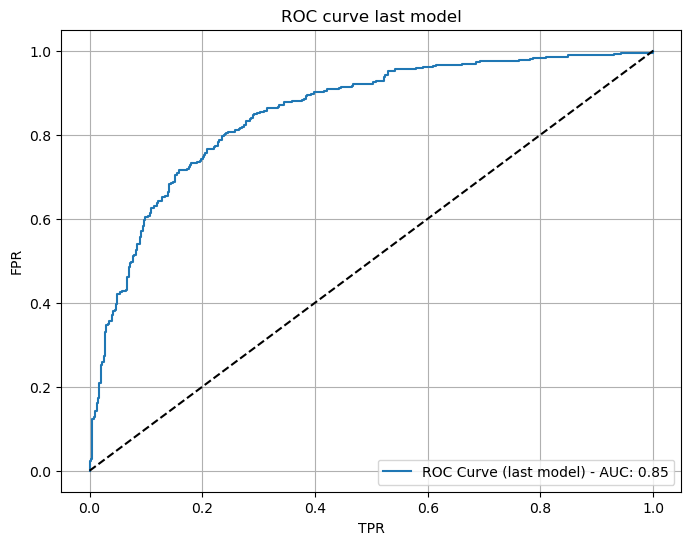

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, roc_curve, classification_report, roc_auc_score
import matplotlib.pyplot as plt

#Independent variables (metrics)
columns=[5,7,8,9,10,11,12,18]
#columns=[5,7,8,9,10,11,12,13,14,15,16,17,18]

X = df.iloc[:, columns]  # todas las métricas

#Dependent variable
y = df.iloc[:, 1] 

# Create LR model
lr = LogisticRegression()

# Configure cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Definine score based on accuracy
scorer = make_scorer(accuracy_score)

#Compute cross validatin
cv_results = cross_validate(lr, X, y, cv=cv, scoring=scorer, return_train_score=True, return_estimator=True)

#Show results of cross validation
print("Accuracy in every fold in training set:", cv_results['train_score'])
print("Accuracy in every fold in test set:", cv_results['test_score'])
print("Test Accuracy mean:", np.mean(cv_results['test_score']))

#Show classification report for last model in last fold
last_model = cv_results['estimator'][-1]
y_pred = last_model.predict(X)  
print(classification_report(y, y_pred))

# ROC curve on last fold in last model 
y_probs = last_model.predict_proba(X)[:, 1]  
fpr, tpr, thresholds = roc_curve(y, y_probs)
auc_value = roc_auc_score(y, y_probs)

plt.figure(figsize=(8, 6))

plt.plot(fpr, tpr, label=f'ROC Curve (last model) - AUC: {auc_value:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.title('ROC curve last model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [16]:
# Obteniendo los nombres de las características y los coeficientes del modelo
# Accediendo al modelo entrenado en el último pliegue
last_model = cv_results['estimator'][-1]

# Extrayendo los coeficientes
coefficients = last_model.coef_[0]


feature_names = X.columns

# Creando un DataFrame para relacionar los coeficientes con sus características correspondientes.
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Ordenando las características por el valor absoluto de los coeficientes para ver cuáles tienen más peso.
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

# Mostrando el DataFrame resultante.
coef_df



,Feature,Coefficient
7,Tort. coverage Tf. Block_11,0.088955
0,Tort Score Tf11,0.039820
3,Tort. coverage Tf. Block_2,-0.032760
4,Tort. coverage Tf. Block_3,0.028741
2,Tort. coverage Tf. Block_1,-0.016738
6,Tort. coverage Tf. Block_5,-0.010032
5,Tort. coverage Tf. Block_4,-0.007547
1,Tort. coverage Tf. Block_0,0.004699
